In [2]:
import os
os.chdir('/rds/general/user/cb1319/home/GEOM3D/Geom3D/')

In [3]:
from geom3d.train_DimeNet import *
import torch
import copy

config_dir = os.getcwd()+"/training/DimeNetPlusPlus_target_80K_TEST_5e4lr/"
config = read_config(config_dir)

config loaded from /rds/general/user/cb1319/home/GEOM3D/Geom3D/training/DimeNetPlusPlus_target_80K_TEST_5e4lr/


In [4]:
# Check if GPU is available
if torch.cuda.is_available():
    # Get the name of the GPU
    gpu_name = torch.cuda.get_device_name(0)  # Assuming you have one GPU; you can change the index if you have multiple GPUs
    print(f"GPU ({gpu_name}) is available.")
else:
    print("No GPU available. Using CPU.")

GPU (Quadro RTX 6000) is available.


In [5]:
import importlib
from geom3d import train_DimeNet

importlib.reload(train_DimeNet)

config["device"] = "cuda:0" if torch.cuda.is_available() else "cpu"
    
np.random.seed(config["seed"])
torch.cuda.manual_seed_all(config["seed"])
# dataset = train_DimeNet.load_data(config)
# print(f"length of dataset: {len(dataset)}")


In [6]:
import wandb
wandb.login()

Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


wandb: Currently logged in as: cyprienbone. Use `wandb login --relogin` to force relogin


True

In [7]:
import importlib
from geom3d import train_DimeNetPlusPlus

importlib.reload(train_DimeNetPlusPlus)
train_DimeNetPlusPlus.main("/rds/general/user/cb1319/home/GEOM3D/Geom3D/training/DimeNetPlusPlus_target_80K_TEST_5e4lr/")

config loaded from /rds/general/user/cb1319/home/GEOM3D/Geom3D/training/DimeNetPlusPlus_target_80K_TEST_5e4lr/
train_idx:  [47044 44295 74783 ... 77925 18116 14762]
valid_idx:  [39698 66692  7139 ... 52300 56176  3346]
test_idx:  [61260 28261 49228 ... 76820   860 15795]


/rds/general/user/cb1319/home/anaconda3/envs/Geom3D/lib/python3.11/site-packages/lightning/pytorch/loggers/wandb.py:389: There is a wandb run already in progress and newly created instances of `WandbLogger` will reuse this run. If this is not desired, call `wandb.finish()` before instantiating `WandbLogger`.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
`Trainer(val_check_interval=1.0)` was configured so validation will run at the end of the training epoch..
/rds/general/user/cb1319/home/anaconda3/envs/Geom3D/lib/python3.11/site-packages/lightning/pytorch/callbacks/model_checkpoint.py:634: Checkpoint directory /rds/general/user/cb1319/home/GEOM3D/Geom3D/training/DimeNetPlusPlus_target_1K_TEST_5e4lr exists and is not empty.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [1]

  | Name             | Type            | Params
-----------------------------------------------------
0 | molecule_3D_

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

/rds/general/user/cb1319/home/anaconda3/envs/Geom3D/lib/python3.11/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:492: Your `val_dataloader`'s sampler has shuffling enabled, it is strongly recommended that you turn shuffling off for val/test dataloaders.
/rds/general/user/cb1319/home/anaconda3/envs/Geom3D/lib/python3.11/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:441: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=31` in the `DataLoader` to improve performance.
/rds/general/user/cb1319/home/anaconda3/envs/Geom3D/lib/python3.11/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:441: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=31` in the `DataLoader` to improve performance.


Training: |          | 0/? [00:00<?, ?it/s]

/rds/general/user/cb1319/home/anaconda3/envs/Geom3D/lib/python3.11/site-packages/lightning/pytorch/trainer/call.py:54: Detected KeyboardInterrupt, attempting graceful shutdown...
wandb: WARNING Source type is set to 'repo' but some required information is missing from the environment. A job will not be created from this run. See https://docs.wandb.ai/guides/launch/create-job


epoch,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
train_loss,█▂▂▂▂▁▂▁▁▁▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
trainer/global_step,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
epoch,0
train_loss,1.34655
trainer/global_step,205


Total time taken for model training: 94.86921072006226 seconds


In [ ]:
os.getcwd()

In [11]:
%matplotlib inline

config loaded from /rds/general/user/cb1319/home/GEOM3D/Geom3D/training/DimeNetPlusPlus_target_80K_TEST_5e4lr/
checkpoint used: /rds/general/user/cb1319/home/GEOM3D/Geom3D/training/DimeNetPlusPlus_target_80K_TEST_5e4lr/epoch=53-val_loss=0.72-other_metric=0.00.ckpt
y_true tensor(-8.7690)
y_pred_cpu tensor(-9.1508, grad_fn=<SqueezeBackward0>)
y_pred tensor(-9.1508, device='cuda:0', grad_fn=<SqueezeBackward0>)
train_idx:  [47044 44295 74783 ... 77925 18116 14762]
valid_idx:  [39698 66692  7139 ... 52300 56176  3346]
test_idx:  [61260 28261 49228 ... 76820   860 15795]
pymodel device cuda:0


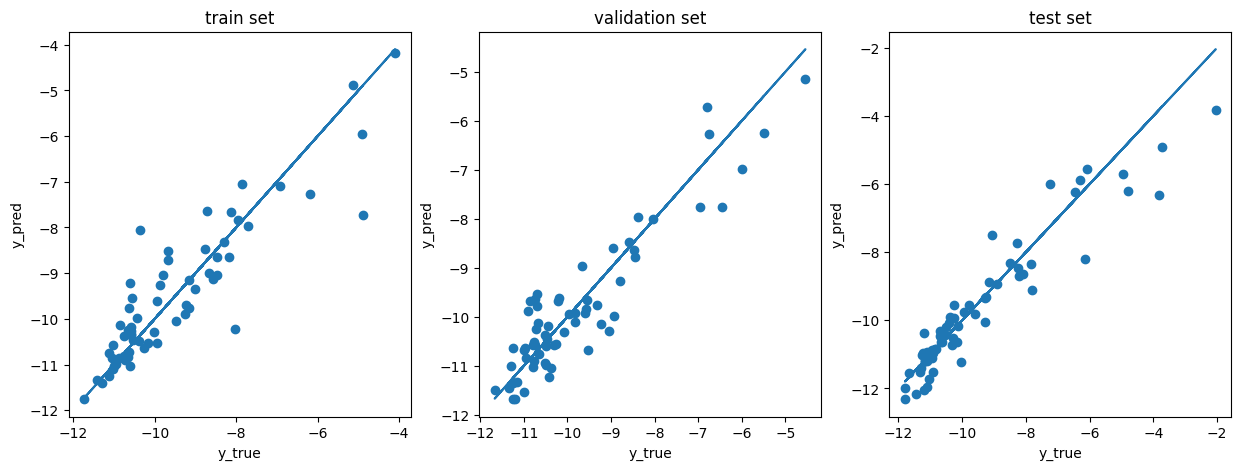

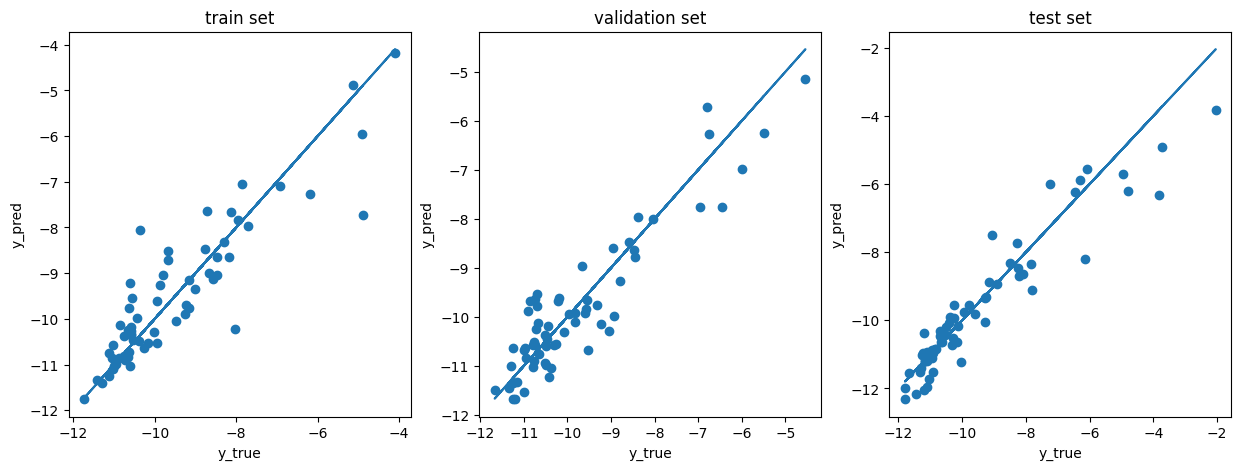

<Figure size 640x480 with 0 Axes>

In [12]:
import importlib
from geom3d.inference_tests import inference_test_DNpp

config_dir = "/rds/general/user/cb1319/home/GEOM3D/Geom3D/training/DimeNetPlusPlus_target_80K_TEST_5e4lr/"
chkpt_path = "/rds/general/user/cb1319/home/GEOM3D/Geom3D/training/DimeNetPlusPlus_target_80K_TEST_5e4lr/epoch=53-val_loss=0.72-other_metric=0.00.ckpt"

importlib.reload(inference_test_DNpp)
inference_test_DNpp.plot_training_results(chkpt_path, config_dir)